영상입력 이진분류 모델 레시피

In [2]:
# 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.models import load_model

#이미지 크기 지정?
width = 28
height = 28

In [3]:
#훈련셋(x_train)과 시험셋(x_test) 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
#훈련셋과 검증셋 분리
x_val = x_train[50000:]
x_train = x_train[:50000]

y_val = y_train[50000:]
y_train = y_train[:50000]

In [5]:
#데이터셋 전처리 : 홀수는 1, 짝수는 0으로 변환 ??
y_train = y_train % 2
y_val = y_val % 2
y_test = y_test % 2

In [6]:
# 모델 구성하기
model = Sequential()
model.add(Dense(256, input_dim=width*height, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [7]:
# 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [8]:
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2937 - accuracy: 0.8854 - val_loss: 0.1516 - val_accuracy: 0.9468
Epoch 2/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1251 - accuracy: 0.9562 - val_loss: 0.0950 - val_accuracy: 0.9689
Epoch 3/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0887 - accuracy: 0.9691 - val_loss: 0.0805 - val_accuracy: 0.9724
Epoch 4/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0703 - accuracy: 0.9764 - val_loss: 0.0713 - val_accuracy: 0.9757
Epoch 5/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0587 - accuracy: 0.9801 - val_loss: 0.0668 - val_accuracy: 0.9777
Epoch 6/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0499 - accuracy: 0.9832 - val_loss: 0.0656 - val_accuracy: 0.9784
Epoch 7/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0427 - accuracy: 0.9858 - val_loss: 0.0590 - val_accuracy:

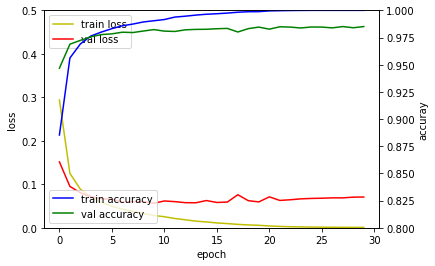

In [11]:
#학습과정 살펴보기
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [12]:
#모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

313/313 [==============================] - 0s 898us/step - loss: 0.0561 - accuracy: 0.9860
## evaluation loss and_metrics ##
[0.05608164519071579, 0.9860000014305115]


In [13]:
#모델 저장
model.save('./model.h5')

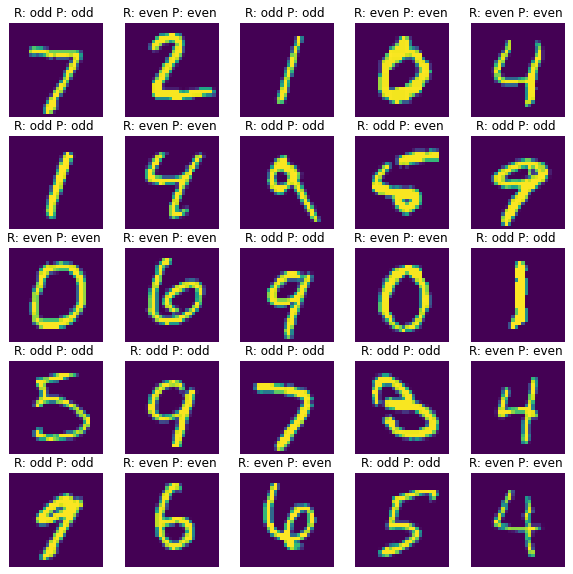

In [22]:
#모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[int(i/plt_row), int(i%plt_col)]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    
    sub_plt_title = 'R: '
    
    if y_test[i] :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '

    sub_plt_title += 'P: '
    
    if yhat_test[i] >= 0.5 :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '        
    
    sub_plt.set_title(sub_plt_title)

plt.show()

In [23]:
print(type(model))

<class 'tensorflow.python.keras.engine.sequential.Sequential'>
